# visualoceanpy examples Jupyter notebook

This notebook is designed to walk you through a number of different plots of data collected on the OOI Cabled Array during the time period of August 20-23, 2017 (this time period co-incides with the total solar eclipse that happened on August 21st.

## Getting Started
First, we need to work on loading in some data from the OOI array. The visualoceanpy library is designed to make this easy via specification of an instrument identification string. These examples use one of the profiling shallow water buoys in the array.

In [1]:
#!cd ..
from visualocean.core import OOIASSET

# this is b.c. of a bug in how my setup is 
# importing visualoceanpy

In [10]:
import datetime

In [5]:
asset = OOIASSET.from_reference_designator(
                 'RS01SBPS-SF01A-2A-CTDPFA102')

The script will need your USER and TOKEN information from your OOI account. These are saved in a file called ooi_auth.json for this example.

In [15]:
# This example is designed to showcase basic data download
# over the time period of the 2017 solar eclipse

stdt = datetime.datetime(2017, 8, 20)
enddt = datetime.datetime(2017, 8, 23)

asset.request_data(
    begin_date=stdt,
    end_date=enddt,
    credfile='ooi_auth.json'
    )

Please wait while data is compiled.


'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cbps@uw.edu/20180313T225938-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample/catalog.html'

In [21]:
# you need to wait for the request to complete
# after it completes, you can go to a URL to see whether your
# request is completed.

print(asset.thredds_url) # Go to url to see the status

# now, need to convert from this structure to an pandas xarray
# we'll call it 'ds' for dataset
ds = asset.to_xarray()


https://opendap.oceanobservatories.org/thredds/catalog/ooi/cbps@uw.edu/20180313T225938-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample/catalog.html
Request completed


In [26]:
#TODO: Add in "offline" mode that allows for plotting 
#      without having to load data in via OOI every time
import xarray as xr
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
# Plot a simple timeseries of temperature, and PSU vs. pressure

# make time the dominant variable for measurements
ds.swap_dims({'obs':'time'})

<xarray.Dataset>
Dimensions:                     (time: 259194)
Coordinates:
    obs                         (time) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * time                        (time) datetime64[ns] 2017-08-20T00:00:00.731864576 ...
    lat                         (time) float64 dask.array<shape=(259194,), chunksize=(259194,)>
    lon                         (time) float64 dask.array<shape=(259194,), chunksize=(259194,)>
Data variables:
    deployment                  (time) int32 dask.array<shape=(259194,), chunksize=(259194,)>
    id                          (time) |S64 dask.array<shape=(259194,), chunksize=(259194,)>
    conductivity                (time) float64 dask.array<shape=(259194,), chunksize=(259194,)>
    driver_timestamp            (time) datetime64[ns] dask.array<shape=(259194,), chunksize=(259194,)>
    ext_volt0                   (time) float64 dask.array<shape=(259194,), chunksize=(259194,)>
    ingestion_timestamp         (time) datetime64[ns] dask.array

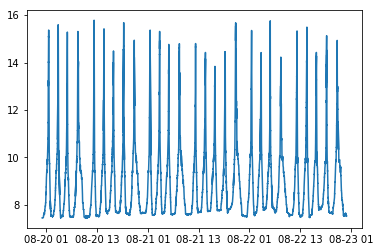

In [28]:
# pull out values from the xarray structure
pressure = ds['seawater_pressure'].values
temperature = ds['seawater_temperature'].values
psu = ds['practical_salinity'].values
ds_time = ds['time'].values

# quick and dirty timeseries plot of temperature for sanity check
plt.plot(ds_time,temperature)
plt.show()

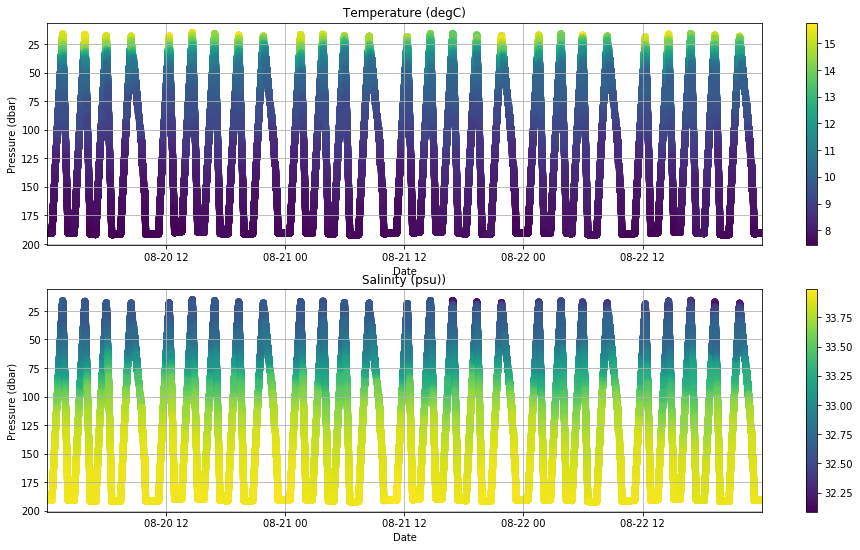

In [32]:
# Now, more complete colored scatter plot, with data plotted
# on a depth vs. time axis.

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(16,9)

# plot temp and salinity curtain plots
ax1.invert_yaxis()
ax1.grid()
ax1.set_xlim(ds_time[0],ds_time[-1])
sc1 = ax1.scatter(ds_time,pressure,c=temperature)
ax1.set_xlabel('Date')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_title('Temperature (degC)')
cb = fig.colorbar(sc1,ax=ax1)

ax2.invert_yaxis()
ax2.grid()
ax2.set_xlim(ds_time[0],ds_time[-1])
ax2.set_xlabel('Date')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_title('Salinity (psu))')
sc2 = ax2.scatter(ds_time,pressure,c=psu)
cb2 = fig.colorbar(sc2,ax=ax2)
plt.show()

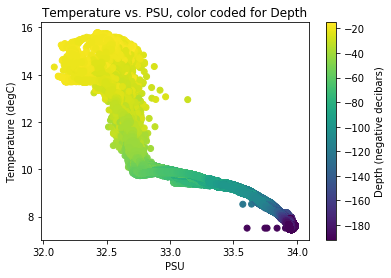

In [35]:
# Now, more complete colored scatter plot, with data plotted
# on a temperature vs. salinty axis, color coded for depth

fig2,(ax3) = plt.subplots(nrows=1,ncols=1)
fig2.set_size_inches(6,4)

sc3 = ax3.scatter(psu,temperature,c=(-1.0*pressure))
ax3.set_title('Temperature vs. PSU, color coded for Depth')
ax3.set_xlabel('PSU')
ax3.set_ylabel('Temperature (degC)')
cb = fig.colorbar(sc3,ax=ax3)
cb.set_label('Depth (negative decibars)')
plt.show()


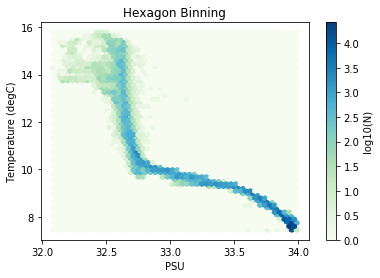

In [37]:
fig3,ax4 = plt.subplots(nrows=1,ncols=1)
fig3.set_size_inches(6,4)

hb = ax4.hexbin(psu,temperature,
                gridsize=50,
                bins='log',
                cmap=plt.cm.GnBu)
ax4.set_title('Hexagon Binning')
ax4.set_xlabel('PSU')
ax4.set_ylabel('Temperature (degC)')
cb = fig3.colorbar(hb, ax=ax4)
cb.set_label('log10(N)')
plt.show()


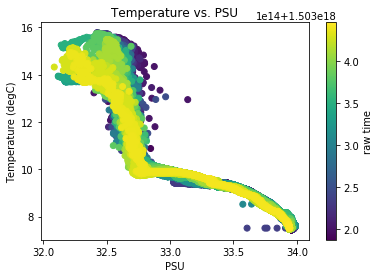

In [40]:
# Now, more complete colored scatter plot, with data plotted
# on a temperature vs. salinty axis, color coded for time (in seconds
# since )

fig2,(ax3) = plt.subplots(nrows=1,ncols=1)
fig2.set_size_inches(6,4)

sc3 = ax3.scatter(psu,temperature,c=(ds_time))
ax3.set_title('Temperature vs. PSU')
ax3.set_xlabel('PSU')
ax3.set_ylabel('Temperature (degC)')
cb = fig.colorbar(sc3,ax=ax3)
cb.set_label('raw time')
plt.show()


In [54]:
# This looks interesting, with distinct upper water masses in a couple
# different time periods. 
# TODO: Split into 4x4 plots to tease this out?